# #Aquiestamoslasfeministas 

En este proyecto vamos a analizar un hashtag de Twitter creado por feministas españolas. Sospechamos que no es natural y espontáneo, sino un intento de presionar politicamente y de lanzar odio hacia las personas trans. El hashtag es #aquiestamoslasfeministas. Ese tipo de feministas son llamadas "Trans Exclusionary Radical Feminists" (Feministas radicales trans excluyentes), así que de ahora en adelante las vamos a llamar TERFs de forma abreviada.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import unidecode as ud
from IPython.display import Image

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

### Vista general del hashtag

Previamente hemos descargado los tweets del hashtag en un archivo .txt con un programa llamado [t-hoarder](https://github.com/congosto/t-hoarder).

Abrimos el archivo .txt con pandas para tenerla en formato dataframe).

In [2]:
ht = pd.read_csv('aquiestamoslasfeministas_clean_ok.txt', sep="\t", on_bad_lines="skip")
ht

,id tweet,date,author,text,app,id user,followers,following,stauses,location,urls,geolocation,name,description,url_media,type media,quoted,relation,replied_id,user replied,retweeted_id,user retweeted,quoted_id,user quoted,first HT,lang,created_at,verified,avatar,link
0,1394213858621939712,2021-05-17 08:51:01,@madredecabrones,"Que quede claro que no somos la derecha, ni bocs, ni HO... Que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... Si no podéis venir, podéis ayudar por aquí...#Aquiestamoslasfeministas 💪💜",Twitter for Android,747827006780354561,1516,2489,19574,"Madrid, España",None,None,Madre de Cabrones,"Antirreligiosa, republicana, feminista (FEMINAZGUL 💜...not the fun kind), metalera, Slytherin y Hobbit. Equidistánfoba. A las cosas por su nombre.",None,None,None,reply,1394213854364774401,@madredecabrones,None,None,None,None,Aquiestamoslasfeministas,es,2016-06-28 16:20:27,False,https://pbs.twimg.com/profile_images/1332116114910883842/uGrU3-Cj_normal.jpg,https://twitter.com/madredecabrones/status/1394213858621939712
1,1394216517504544771,2021-05-17 09:01:35,@verketal,"RT @madredecabrones: Que quede claro que no somos la derecha, ni bocs, ni HO... Que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... Si no podéis venir, podéis ayudar por aquí...#Aquiestamoslasfeministas 💪💜",Twitter for Android,483372414,668,1546,4745,NaN,None,None,Verolerolerola,"Ácrata, protestona y rara",None,None,None,RT,None,None,1394213858621939712,@madredecabrones,None,None,Aquiestamoslasfeministas,es,2012-02-04 23:14:18,False,https://pbs.twimg.com/profile_images/1364131403789701125/BaBq2b_r_normal.jpg,https://twitter.com/verketal/status/1394216517504544771
2,1394220302457004034,2021-05-17 09:16:38,@ciudada21613757,#aquíestamoslasfeministas 💪💪💪💜💜💜💜,Twitter Web App,1340262188137758725,154,298,2545,NaN,None,None,ciudadanadelmundo,"Viajera, realista, todavía me siguen asombrando cosas, optimista y feminista ,aunque parezcan términos contradictorios....Y mujer siempre.",None,None,None,None,None,None,None,None,None,None,aquíestamoslasfeministas,und,2020-12-19 11:46:33,False,https://pbs.twimg.com/profile_images/1340262524139266053/bpeF5DYg_normal.jpg,https://twitter.com/ciudada21613757/status/1394220302457004034
3,1394221577361838080,2021-05-17 09:21:42,@fanivs,"RT @madredecabrones: Que quede claro que no somos la derecha, ni bocs, ni HO... Que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... Si no podéis venir, podéis ayudar por aquí...#Aquiestamoslasfeministas 💪💜",Twitter for Android,293531424,845,617,83200,NaN,None,None,estefania,no se si soy yo la rara o es el mundo que se está volviendo loco. radfem abolicionista.,None,None,None,RT,None,None,1394213858621939712,@madredecabrones,None,None,Aquiestamoslasfeministas,es,2011-05-05 14:22:39,False,https://pbs.twimg.com/profile_images/1014951735520096257/CphFmRuf_normal.jpg,https://twitter.com/fanivs/status/1394221577361838080
4,1394221775429513221,2021-05-17 09:22:29,@redindomitable,"RT @madredecabrones: Que quede claro que no somos la derecha, ni bocs, ni HO... Que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... Si no podéis venir, podéis ayudar por aquí...#Aquiestamoslasfeministas 💪💜",Twitter for Android,3297638685,1519,776,10894,"Barcelona, España",None,None,Red indomitable 🌷,Feminista Radical. Pronombres: #ManoloCagaTranquilo #DetectoresDeAurasQueer #HackeaTuBiologia #ConsultorioDeBiologiaBasica #ClasificadorDeConstructos,None,None,None,RT,None,None,1394213858621939712,@madredecabrones,None,None,Aquiestamoslasfeministas,es,2015-05-25 11:09:11,False,https://pbs.twimg.com/profile_images/1340962053671047168/VDozYFCp_normal.jpg,https://twitter.com/r

Con una opción de t-hoarder podemos obtener un archivo .gdf con los datos de los retweets y con el programa Gephi hacemos un grafo para observar como se comportan los usuarios y cuáles son las comunidades del hashtag.

In [3]:
Image(url="Imagenes/aquiestamoslasfeministas_small.png", width=600,height=600)

Tras eso podemos exportar la información de las comunidades en un archivo .csv. Extraemos las columnas 'Label' (equivalente a author) y 'modularity_class' (comunidades) para añadirlas a nuestro dataframe principal. También cambiamos la columna 'Label' a 'author' para poderlas añadir más adelante. Para estandarizar nuestros datos, convertimos las columnas 'author', 'text' y 'user retweeted' minúsculas. Finalmente, unimos la columna 'modularity class' al dataframe, usando la columna 'author' como referencia.

In [4]:
ht_modularity = pd.read_csv('aquiestamoslasfeministas_modularidad.csv')
ht_modularity = ht_modularity[['Label', 'modularity_class']]
ht_modularity.columns=['author', 'modularity_class']
ht_modularity['author'] = ht_modularity['author'].str.lower()
ht['author'] = ht['author'].str.lower()
ht['text'] = ht['text'].str.lower()
ht['user retweeted'] = ht['user retweeted'].str.lower()
ht = ht.merge(ht_modularity, how="left", on="author")
ht.head(2)

,id tweet,date,author,text,app,id user,followers,following,stauses,location,urls,geolocation,name,description,url_media,type media,quoted,relation,replied_id,user replied,retweeted_id,user retweeted,quoted_id,user quoted,first HT,lang,created_at,verified,avatar,link,modularity_class
0,1394213858621939712,2021-05-17 08:51:01,@madredecabrones,"que quede claro que no somos la derecha, ni bocs, ni ho... que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... si no podéis venir, podéis ayudar por aquí...#aquiestamoslasfeministas 💪💜",Twitter for Android,747827006780354561,1516,2489,19574,"Madrid, España",None,None,Madre de Cabrones,"Antirreligiosa, republicana, feminista (FEMINAZGUL 💜...not the fun kind), metalera, Slytherin y Hobbit. Equidistánfoba. A las cosas por su nombre.",None,None,None,reply,1394213854364774401,@madredecabrones,None,none,None,None,Aquiestamoslasfeministas,es,2016-06-28 16:20:27,False,https://pbs.twimg.com/profile_images/1332116114910883842/uGrU3-Cj_normal.jpg,https://twitter.com/madredecabrones/status/1394213858621939712,5.0
1,1394216517504544771,2021-05-17 09:01:35,@verketal,"rt @madredecabrones: que quede claro que no somos la derecha, ni bocs, ni ho... que quede claro que somos mujeres, madres, hijas cansadas de que el patriarcado se disfrace con colorinchis para clavarnosla aún más profundo... si no podéis venir, podéis ayudar por aquí...#aquiestamoslasfeministas 💪💜",Twitter for Android,483372414,668,1546,4745,NaN,None,None,Verolerolerola,"Ácrata, protestona y rara",None,None,None,RT,None,None,1394213858621939712,@madredecabrones,None,None,Aquiestamoslasfeministas,es,2012-02-04 23:14:18,False,https://pbs.twimg.com/profile_images/1364131403789701125/BaBq2b_r_normal.jpg,https://twitter.com/verketal/status/1394216517504544771,4.0


A partir de la columna 'date' creamos otra con solo la fecha y la hora, sin minutos ni segundos.

In [5]:
ht['date_calc'] = ht['date'].apply(lambda x: x.split(":")[0])
ht['date_calc'] = ht['date_calc'].apply(lambda x: x + ":00")

Con esa nueva columna construimos una tabla dinámica para calcular cuántos tweets de cada clase hay por hora.

In [6]:
tweets_hour = pd.pivot_table(ht,index= "date_calc",columns= "modularity_class",aggfunc= ["count"],values=['id tweet'])
tweets_hour = tweets_hour.fillna(0)
tweets_hour.to_csv('distribucion_por_horas.csv')

tweets_hour = pd.read_csv('distribucion_por_horas.csv')
tweets_hour.columns = tweets_hour.iloc[1]
tweets_hour = tweets_hour[3:]
tweets_hour.to_csv('distribucion_por_horas.csv')

tweets_hour = pd.read_csv('distribucion_por_horas.csv')
tweets_hour = tweets_hour.drop(['Unnamed: 0'], axis=1)
tweets_hour.rename(columns={'modularity_class':'hour'}, inplace=True)
tweets_hour.head()

,hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,2021-05-17 08:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2021-05-17 09:00,0.0,0.0,2.0,1.0,5.0,4.0,0.0,3.0,0.0,0.0,0.0
2,2021-05-17 10:00,0.0,0.0,1.0,0.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
3,2021-05-17 11:00,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-17 12:00,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


Representamos el número de tweets por hora en un gráfico de barras acumuladas para identificar diferentes picos de actividad y la importancia de las diferentes comunidades. 

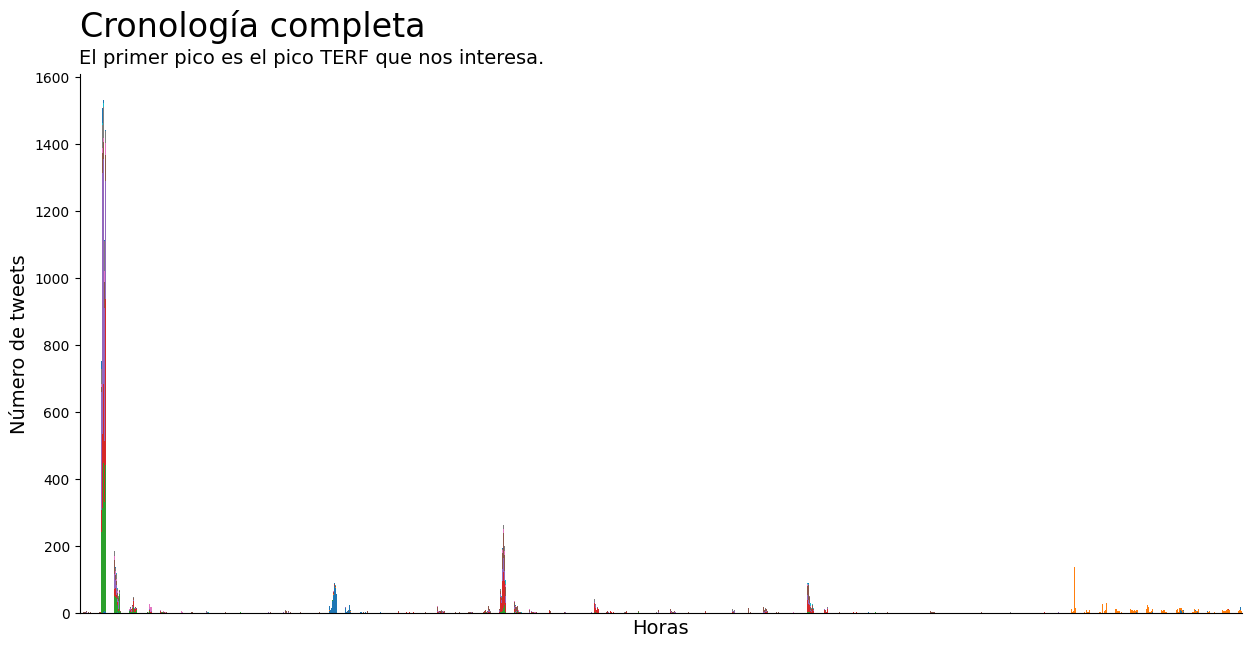

In [7]:
ax = tweets_hour.plot.bar(x='hour', stacked=True,figsize=(15,7),legend=None)
ax.spines[['top','right']].set_visible(False)
plt.text(-0.4,1720,'Cronología completa',fontsize=24)
plt.text(-0.55,1640,'El primer pico es el pico TERF que nos interesa.',fontsize=14)
plt.xlabel('Horas',fontsize=14)
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Número de tweets',fontsize=14)
plt.savefig('1. cronologia completa.jpg',bbox_inches='tight',dpi=200)

Manualmente buscamos los usuarios más importantes de cada comunidad en Twitter y vemos que el primer pico está causado por TERFs, así que le hacemos zoom. Tomamos los días 18 y 19 de mayo completos.

In [8]:
viz_peak_terf = tweets_hour[(tweets_hour['hour'] > "2021-05-18 00:00")&(tweets_hour['hour'] < "2021-05-20 00:00")]
viz_peak_terf.head(5)

,hour,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
16,2021-05-18 01:00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17,2021-05-18 04:00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
18,2021-05-18 05:00,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
19,2021-05-18 06:00,0.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
20,2021-05-18 07:00,0.0,0.0,242.0,66.0,353.0,13.0,10.0,45.0,0.0,1.0,22.0


Quitamos las clases 0, 1 y 8 porque son feministas a secas y nos interesan las cuentas TERF. Renombramos las columnas para identificar el tipo de comunidad y la cuenta principal.

In [9]:
viz_peak_terf = viz_peak_terf.drop(['0.0','1.0','8.0'], axis=1)
viz_peak_terf.columns = ['time','2-TERFS @mabolicion','3-TERFS @maryreflektor','4-TERFS @EstherPedroche',
                     '5-TERFS @confluenciamf','6-TERFS','7-TERFS @Estacadebares','9-TERFS','10-TERFS']

Representamos el pico para mayor claridad.

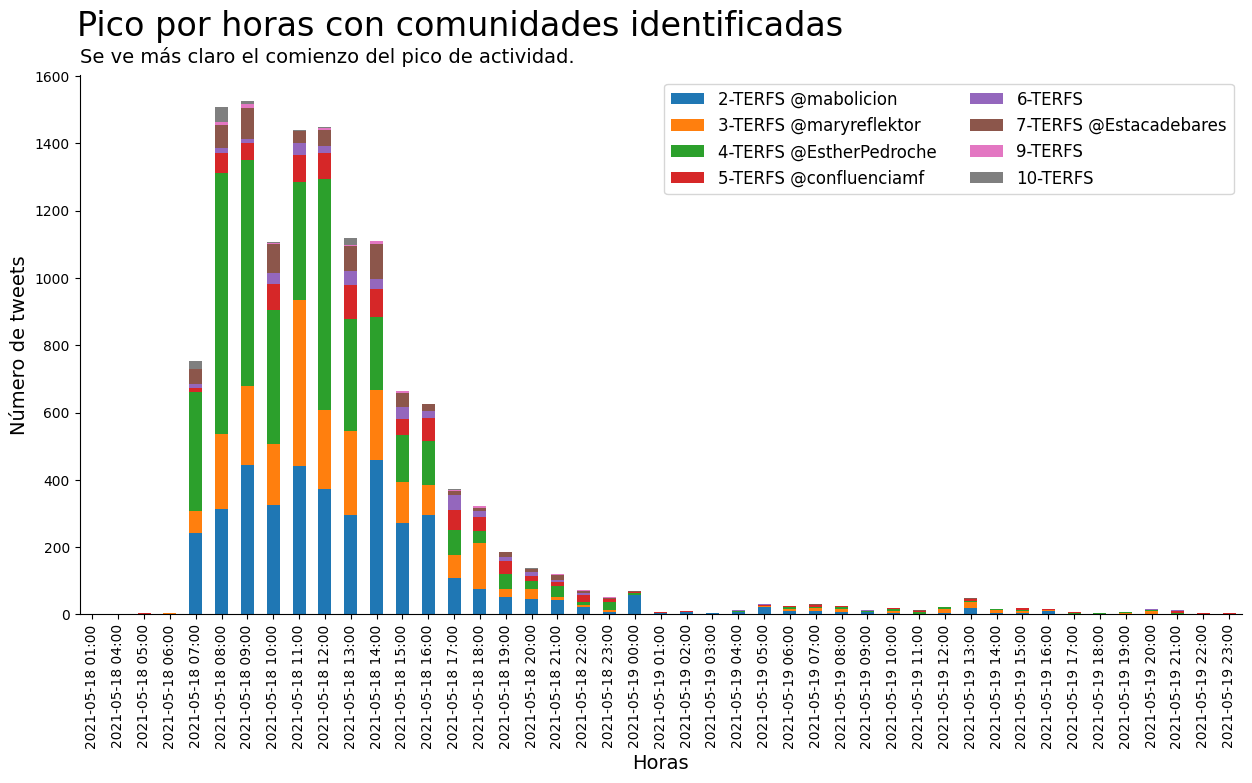

In [10]:
ax = viz_peak_terf.plot.bar(x='time', stacked=True,figsize=(15,7))
ax.spines[['top','right']].set_visible(False)
plt.xticks(rotation=90,ha='center')
plt.legend(loc='upper right', ncol=2, fontsize = 'large')
plt.text(-0.6,1720,'Pico por horas con comunidades identificadas',fontsize=24)
plt.text(-0.5,1640,'Se ve más claro el comienzo del pico de actividad.',fontsize=14)
plt.xlabel('Horas', fontsize=14)
plt.tick_params(axis='x',which='both',bottom=True,top=False,labelbottom=True)
plt.ylabel('Número de tweets',fontsize=14)
plt.savefig('2. pico por horas.jpg',bbox_inches='tight',dpi=100)

Esta vez transformamos el tiempo en fecha, horas y minutos.

In [11]:
ht_minutes = ht
ht_minutes['date_calc'] = ht_minutes['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
ht_minutes['date_calc'] = ht_minutes['date_calc'].apply(lambda x:x.strftime('%Y-%m-%d %H:%M'))

Creamos otra tabla dinámica de la misma forma.

In [12]:
tweets_minutes = pd.pivot_table(ht_minutes,index= "date_calc",columns= "modularity_class",aggfunc= ["count"],values=['id tweet'])
tweets_minutes = tweets_minutes.fillna(0)
tweets_minutes.to_csv('distribucion_por_minutos.csv')

tweets_minutes = pd.read_csv('distribucion_por_minutos.csv')
tweets_minutes.columns = tweets_minutes.iloc[1]
tweets_minutes = tweets_minutes[3:]
tweets_minutes.to_csv('distribucion_por_minutos.csv')

tweets_minutes = pd.read_csv('distribucion_por_minutos.csv')
tweets_minutes = tweets_minutes.drop(['Unnamed: 0'], axis=1)
tweets_minutes.rename(columns={'modularity_class':'minute'}, inplace=True)
tweets_minutes.head()

,minute,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
0,2021-05-17 08:51,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2021-05-17 09:01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-05-17 09:16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2021-05-17 09:21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-17 09:22,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Hacemos zoom a las primeras dos horas del día 18 de mayo.

In [13]:
start_hashtag = tweets_minutes[(tweets_minutes['minute'] > "2021-05-18 06:30")&(tweets_minutes['minute'] < "2021-05-18 08:15")]

Descartamos las mismas clases y aplicamos los mismos nombres a las columnas como hicimos previamente.

In [14]:
start_hashtag = start_hashtag.drop(['0.0','1.0','8.0'], axis=1)
start_hashtag.columns = ['time','2-TERFS @mabolicion','3-TERFS @maryreflektor','4-TERFS @EstherPedroche',
                     '5-TERFS @confluenciamf','6-TERFS','7-TERFS @Estacadebares','9-TERFS','10-TERFS']

Representamos de nuevo.

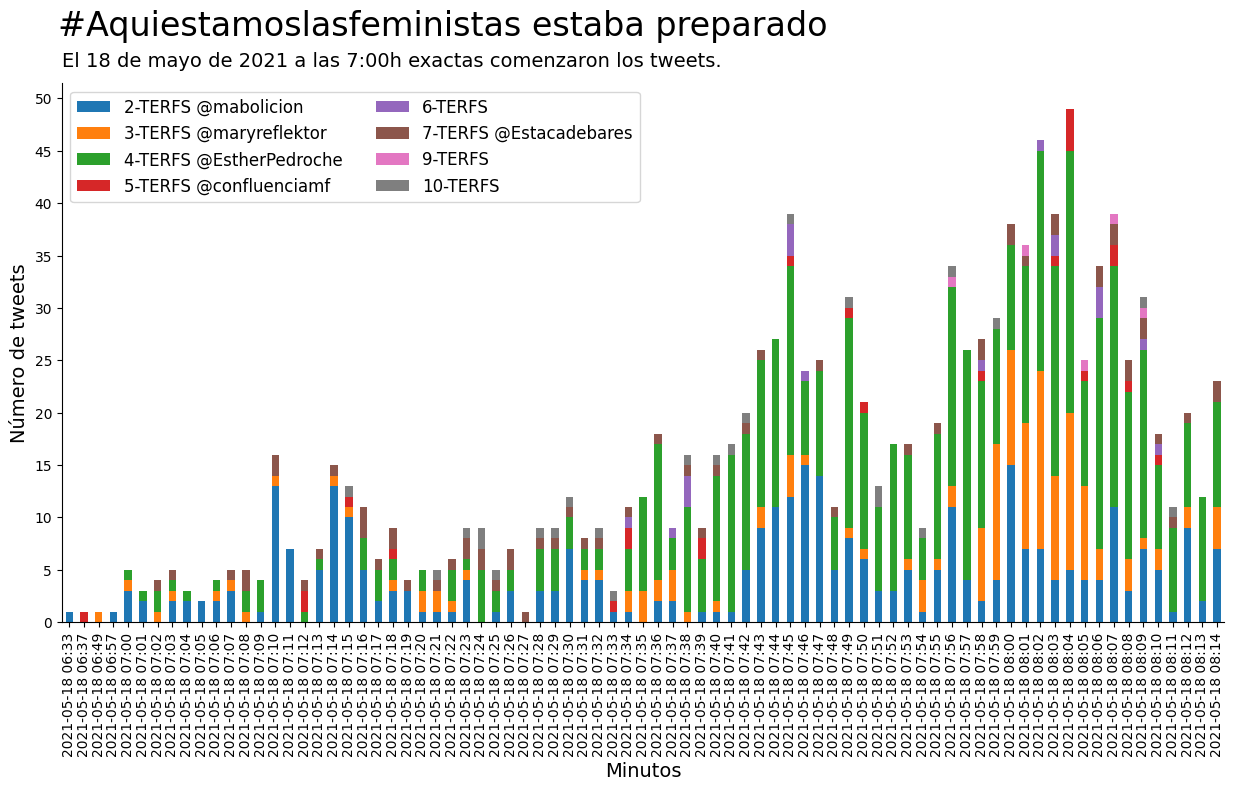

In [15]:
ax = start_hashtag.plot.bar(x='time', stacked=True, figsize=(15,7))
ax.spines[['top','right']].set_visible(False)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,55,5.0))
plt.text(-0.75,56,'#Aquiestamoslasfeministas estaba preparado',fontsize=24)
plt.text(-0.5,53,'El 18 de mayo de 2021 a las 7:00h exactas comenzaron los tweets.',fontsize=14)
plt.legend(loc='upper left', ncol=2, fontsize = 'large')
plt.xlabel('Minutos',fontsize=14)
plt.ylabel('Número de tweets',fontsize=14)
plt.savefig('3. pico por minutos.jpg',bbox_inches='tight',dpi=100)

### Primeros 5 tweets

Veamos los primeros 5 tweets.

In [16]:
primeros_5_tweets = ht[ht['date'] > '2021-05-18 06:59'].head()
primeros_5_tweets[['id tweet','date','author','text']]

,id tweet,date,author,text
109,1394548309021319168,2021-05-18 07:00:00,@vanguardiafemi2,"hoy, 18 de mayo, pasará a la historia como el día en que el congreso traicionó a las mujeres. el comienzo de una etapa en la que el feminismo español se queda definitivamente huérfano en el arco parlamentario. @psoe @gpscongreso #leytransespatriarcal #aquiestamoslasfeministas"
110,1394548312666112000,2021-05-18 07:00:01,@mariia842020,el @psoe @gpscongreso verá si se posiciona hoy con las mujeres o con las farmacéuticas que quieren convertir a niños y niñas en pacientes de por vida. #leytransespatriarcal #aquiestamoslasfeministas https://t.co/u5yuukxw5s
111,1394548336447873026,2021-05-18 07:00:07,@ladydiampa,"si negamos el sexo, negamos la opresión de la mujer en base a él. no a la toma en consideración de la ley trans @psoe @gpscongreso #leytransespatriarcal #aquiestamoslasfeministas"
112,1394548371650715650,2021-05-18 07:00:15,@mabolicion,hoy pretenden dar luz verde a una de las leyes trans que amenazan los derechos de las mujeres a razón de sexo. #leytransespatriarcal #aquiestamoslasfeministas para dejar claro que no queremos estas leyes https://t.co/fnomdwklgh vía @_infolibre
113,1394548549728284675,2021-05-18 07:00:58,@veronikautomtk,#leytransespatriarcal #aquiestamoslasfeministas https://t.co/ofuh7vdvon


El hashtag empieza exactamente a las 7:00h. Como en el primer minuto hay 3 clases diferentes y 5 tweets originales de autores únicos podemos confirmar que el hashtag estaba preparado. El motivo de la fecha es el siguiente:

### "El Congreso votará el martes 18 de mayo la toma en consideración de la ley trans"
https://www.elsaltodiario.com/ley-trans/el-congreso-votara-el-martes-18-de-mayo-la-toma-en-consideracion-de-la-ley-trans

Una vez que sabemos los días del pico vamos a filtrar nuestro dataframe para limpiar nuestros datos.

In [17]:
ht_pico = ht[(ht['date'] > "2021-05-18 00:00")&(ht['date'] < "2021-05-20 00:00")]
print('El pico tiene',len(ht_pico),'tweets')

El pico tiene 13150 tweets


Aparte tenemos que quitar las comunidades que no son TERF.

In [18]:
ht_terf = ht_pico[ht_pico['modularity_class'].isin([2.0,3.0,4.0,5.0,6.0,7.0,9.0,10.0])].reset_index(inplace=False)
ht_terf = ht_terf.drop(['index'], axis=1)

Una vez hemos limpiado los datos los exportamos a un archivo .txt que usaremos en un futuro.

In [19]:
ht_terf.to_csv('aquiestamoslasfeministas_pico.txt',sep='\t',index=False)

### Número de usuarios 

In [20]:
print(len(ht_terf['author']),'usuarios fueron responsables del pico.')

13009 usuarios fueron responsables del pico.


### A quién se hace presión política

Vamos a obtener las menciones. Creamos una función que busque en la columna 'text' las palabras que empiezan por @.

In [21]:
def extraer_mentions(row):
    texto = row['text']
    mentions = re.findall(r"@(\w+)", texto)
    findall_mentions.append(mentions)

Aplicamos la función y obtenemos una lista de lista. Aplicamos un loop para separar los hashtags de uno en uno, quitar las tildes y poner en minúsculas los hashtags.

In [22]:
findall_mentions = []

ht_terf.apply(extraer_mentions,axis=1)
lista_mentions = []
for lista in findall_mentions:
    for mention in lista:
        mention = ud.unidecode(mention)
        mention = mention.lower()
        lista_mentions.append(mention)


Convertimos la lista de hashtags a dataframe.

In [23]:
lista_mentions_series = pd.Series(lista_mentions)
mentions_count = lista_mentions_series.value_counts()
mentions_count = mentions_count.reset_index()
mentions_count.columns = ['user','mentions']

Contamos los retweets recibidos para limpiar los datos ya que para twitter un retweet se traduce como "rt @" y también se contabiliza como mención. Después los restaremos al número de menciones

In [24]:
rts = ht_terf['user retweeted'].value_counts()

Pasamos la serie a DataFrame.

In [25]:
rts = rts.to_frame().reset_index()
rts.columns = ['user','rts_received']

In [26]:
rts['user'] = rts['user'].apply(lambda x:x.replace('@',''))

Juntamos las menciones y los retweets recibidos asegurándonos que cada número de menciones corresponde a su usuario.

In [27]:
mentions_merged = mentions_count.merge(rts,how='left',on='user')

A los que no tenga retweets porque no han participado en el hashtag o no han recibido ninguno les ponemos un 0.

In [28]:
mentions_merged['rts_received'] = mentions_merged['rts_received'].fillna(0)

Restamos los retweets recibidos a las menciones.

In [29]:
mentions_merged['mentions'] = mentions_merged['mentions'] - mentions_merged['rts_received']

Representamos el top 20 con un gráfico de barras horizontales.

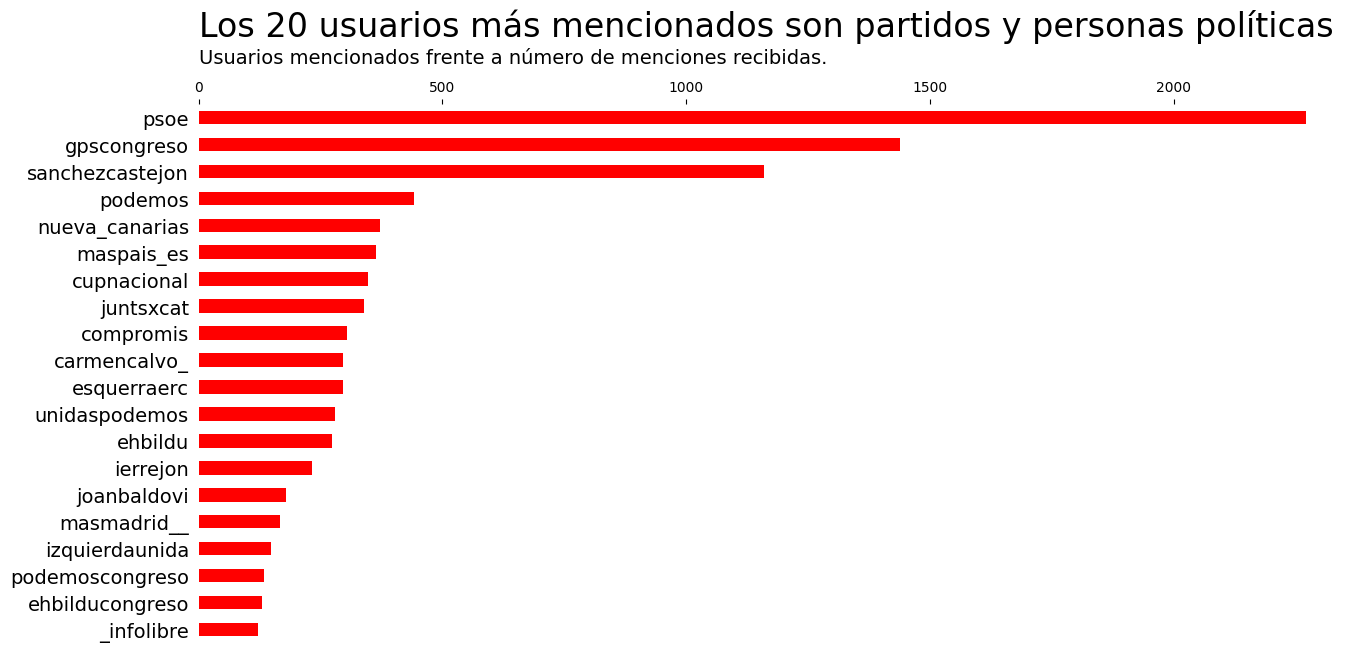

In [30]:
mentions = mentions_merged.sort_values(by='mentions',ascending=True).tail(20)

ax = mentions.plot.barh(x='user',y='mentions',figsize=(15,7),color='red',label='',legend=None,fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios más mencionados son partidos y personas políticas',fontsize=24)
plt.text(0,21,'Usuarios mencionados frente a número de menciones recibidas.',fontsize=14)
plt.savefig('5. menciones.jpg',bbox_inches='tight',dpi=100)

### Hashtags secundarios más usados

Repetimos el mismo proceso de obtención con los hashtags.

In [31]:
def extraer_hashtags(row):
    texto = row['text']
    hashtags = re.findall(r"#(\w+)", texto)
    findall_hashtags.append(hashtags)

In [32]:
findall_hashtags = []

ht_terf.apply(extraer_hashtags,axis=1)

None #para que no salga ningún resultado en la celda

In [33]:
lista_hashtags = []
for lista in findall_hashtags:
    for hashtag in lista:
        hashtag = ud.unidecode(hashtag)
        hashtag = hashtag.lower()
        lista_hashtags.append(hashtag)

In [34]:
lista_hashtags_series = pd.Series(lista_hashtags)

In [35]:
hashtag_count = lista_hashtags_series.value_counts().head(20)
hashtag_count = hashtag_count.reset_index()
hashtag_count.columns = ['hashtag','count']

Quitamos el primero porque es el hashtag de estudio, queremos visualizar los secundarios.

In [36]:
ht_secundarios = hashtag_count.drop(0)

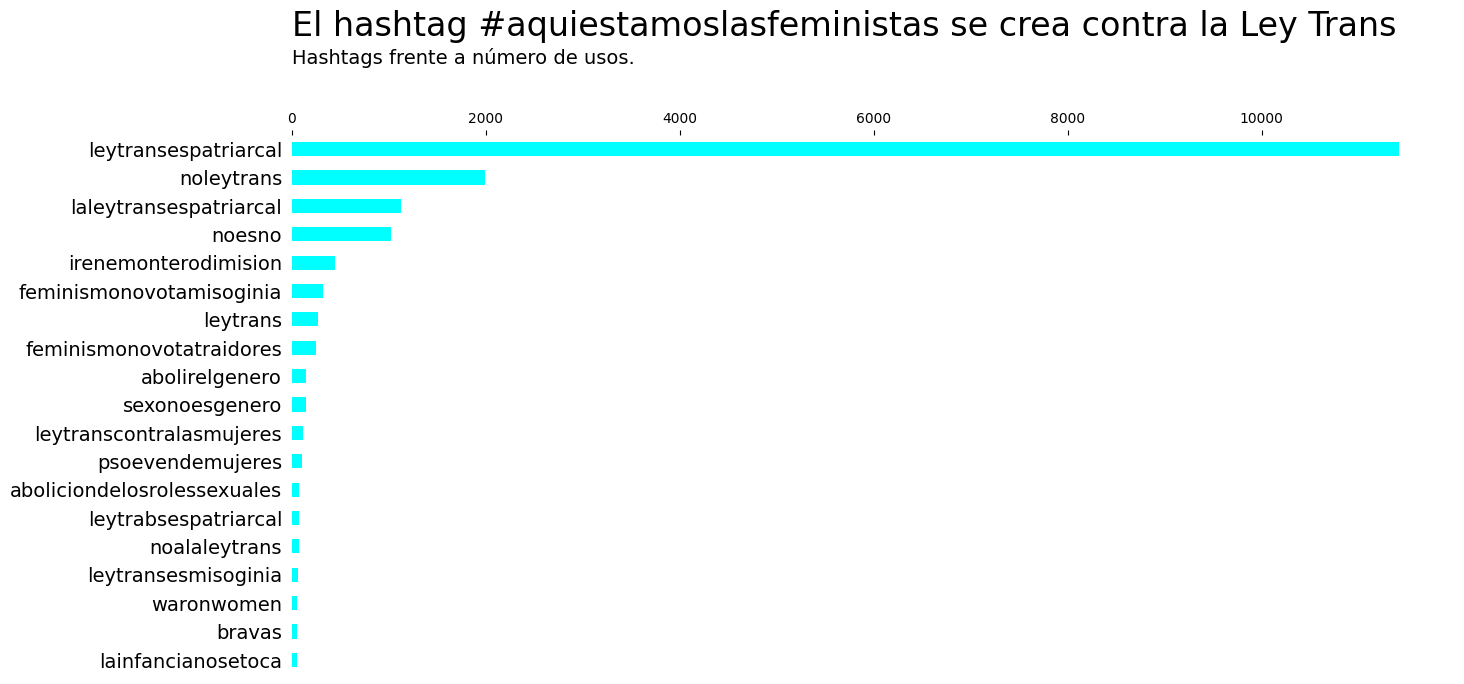

In [37]:
ht_secundarios = ht_secundarios.sort_values(by='count',ascending=True)
ax = ht_secundarios.plot.barh(x='hashtag',y='count',figsize=(15,7),color='cyan',label='',legend=None,fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'El hashtag #aquiestamoslasfeministas se crea contra la Ley Trans',fontsize=24)
plt.text(0,21,'Hashtags frente a número de usos.',fontsize=14)
plt.savefig('5.1 hashtags secundarios.jpg',bbox_inches='tight',dpi=100)

### Tweets más retweeteados

Contamos los tweets más retweeteados y los guardamos como dataframe para hacerlos más fáciles de leer.

In [38]:
mas_retweeteados = ht_terf['text'].value_counts().to_frame().reset_index()
mas_retweeteados.columns = ['text','count']
mas_retweeteados

,text,count
0,rt @estherpedroche: pido a todos mis seguidores y seguidoras que se unan a la campaña #leytransespatriarcal . #aquiestamoslasfeministas para recordarle a @sanchezcastejon qué #noesno . no al borrado jurídico de las mujeres.,362
1,rt @mabolicion: las leyes trans no regulan derechos para nadie. lo que promueven simplemente es que cualquier hombre pueda ser legalmente mujer solo con decir que lo es. #leytransespatriarcal y #aquiestamoslasfeministas para luchar contra esta ofensa patriarcal https://t.co/bkleyuwpsv,327
2,rt @mabolicion: a ver cuántas de las aliadas del patriarcado que hoy defienden la #leytransespatriarcal dejarán a sus hijas solas en vestuarios en los que accederán hombres solo por declararse mujeres #leytransespatriarcal #aquiestamoslasfeministas defendiendo nuestros espacios https://t.co/i3p32raqnw,159
3,"rt @iria_maranon: hoy se debate en el congreso la ""ley trans"". por la infancia y por las mujeres, revisad los efectos que esta ley ha tenido en otros países y estudiad cómo nos prejudica. confíamos en que la frenéis @psoe #leytransespatriarcal #aquiestamoslasfeministas #abolirelgénero",133
4,"rt @mabolicion: las identidades de género ridiculizan lo que es ser mujer, nuestra biología es secundaria mientras que los estereotipos se convierten en realidades nuestra opresión, su elección #leytransespatriarcal #aquiestamoslasfeministas https://t.co/nik1fx5028",128
...,...,...
3576,no vamos a callar frente al borrado de las mujeres. #leytransespatriarcal #aquiestamoslasfeministas #irenemonterodimision #feminismonovotatraidores,1
3577,¿qué buscan las leyes trans? lo que ha buscado el patriarcado toda la vida. silenciar a las mujeres. ahora más fácilmente haciéndose pasar por nosotras #leytransespatriarcal #aquiestamoslasfeministas https://t.co/jimfo7tpm4,1
3578,¿con qué derecho un grupo de hombres se ponen a definir lo que es ser mujer ? @psoe @unidaspodemos @esquerraerc @maspais_es @cupnacional @juntsxcat @nueva_canarias @compromis #leytransespatriarcal #aquiestamoslasfeministas https://t.co/xiuokkwtdm,1
3579,@sonya_mujer estoy con vosotras 💜 #aquíestamoslasfeministas #laleytransespatriarcal,1


# Calcular volúmenes de autores

Creamos la base de nuestro dataframe de volumen con los usuarios únicos.

In [84]:
volume = ht_terf['author'].to_frame()
volume = volume.drop_duplicates(subset='author')
volume = volume.reset_index().drop('index',axis=1)
volume.head()

,author
0,@palabrademiss9
1,@lolafergut
2,@madredecabrones
3,@acosine2
4,@nurialblazquez


Calculamos la cantidad de aportaciones totales, retweets, original_tweets y tweets recibidos. Dejo los totales como ejemplo.

In [85]:
total = ht_terf['author'].value_counts().reset_index()
total.columns = ['author','total']
total.head()

,author,total
0,@maramartelgued2,421
1,@brujitarad,292
2,@rayashla,235
3,@esatesunaprueb1,204
4,@maioraane,173


In [86]:
ht_terf_rt = ht_terf[ht_terf['relation'] == 'RT']

retweets_hechos = ht_terf_rt['author'].value_counts().reset_index()
retweets_hechos.columns = ['author','rts_made']


In [87]:
ht_terf_original = ht_terf[ht_terf['relation'] != 'RT']

originales = ht_terf_original['author'].value_counts().reset_index()
originales.columns = ['author','original_tweets']

In [88]:
retweets_recibidos = ht_terf['user retweeted'].value_counts().to_frame().reset_index()
retweets_recibidos.columns = ['author','rts_received']

Unimos cada conteo con el dataframe de volume.

In [89]:
volume = volume.merge(total,on='author',how='left')
volume = volume.merge(retweets_hechos,on='author',how='left')
volume = volume.merge(originales,on='author',how='left')
volume = volume.merge(retweets_recibidos,on='author',how='left')

Quitamos los valores NaN y los pasamos a integer (int)

In [90]:
volume = volume.fillna(0)
volume['rts_made'] = volume['rts_made'].apply(lambda x:int(x))
volume['original_tweets'] = volume['original_tweets'].apply(lambda x:int(x))
volume['rts_received'] = volume['rts_received'].apply(lambda x:int(x))
volume

,author,total,rts_made,original_tweets,rts_received
0,@palabrademiss9,2,2,0,0
1,@lolafergut,27,26,1,0
2,@madredecabrones,14,12,2,55
3,@acosine2,1,1,0,0
4,@nurialblazquez,8,8,0,0
...,...,...,...,...,...
1647,@whrcn,1,1,0,0
1648,@__cristina__ss,1,1,0,0
1649,@susanasainz31,1,1,0,0
1650,@p_feministacan,1,1,0,0


### Tweets originales

Es probable que se copien tweets en vez de hacer retweet y esos no los vamos a contar como tweets originales. Vamos a comprobarlo.

Primero quitamos los retweets.

In [91]:
ht_terf_copypaste = ht_terf[ht_terf['relation'] != 'RT']

Quitamos los enlaces del final porque hacen a los tweets diferentes para la API de Twitter, pero en la interfaz de usuario son iguales.

In [92]:
ht_terf_copypaste['text'] = ht_terf_copypaste['text'].apply(lambda x:re.sub(r'http\S+', '', x))

Descartamos los duplicados manteniendo los primeros, que serán de los autores originales porque están ordenados por fecha.

In [93]:
ht_terf_copypaste = ht_terf_copypaste.drop_duplicates(subset='text',keep='first')

Sacamos la serie de autores y tweets verdaderamente originales y la transformamos en dataframe.

In [94]:
true_original_tweets = ht_terf_copypaste['author'].value_counts()
true_original_tweets = true_original_tweets.to_frame().reset_index()
true_original_tweets.columns = ['author','true_original_tweets']

Unimos la columna a la tabla de volumen.

In [95]:
volume = volume.merge(true_original_tweets,how='left',on='author')
volume['true_original_tweets'] = volume['true_original_tweets'].fillna(0)
volume['true_original_tweets'] = volume['true_original_tweets'].apply(lambda x:int(x))
volume = volume[['author','total','original_tweets','true_original_tweets','rts_made','rts_received']]


Contamos los falsos y se los restamos a los originales.

In [96]:
fake_original_count = volume['original_tweets'].sum()
true_original_count = volume['true_original_tweets'].sum()
print(fake_original_count,'-',true_original_count)

2025 - 1740


In [97]:
copied_tweets = volume['original_tweets'].sum() - volume['true_original_tweets'].sum()
print(copied_tweets,'tweets fueron copiados.')

285 tweets fueron copiados.


### Gráficos

Guardamos el número de autores en una variable.

In [98]:
authors_unique = len(volume)

En esta parte vamos a contar los tweets originales, las aportaciones totales y los retweets hechos y recibidos del top 20 de cada medida. También averiguaremos que porcentaje supone del total. Por último vamos a calcular la media de todos los usuarios. Una vez que lo tengamos todo lo vamos a representar en cuatro gráficos.

In [99]:
true_original_top20 = volume.sort_values(by='true_original_tweets',ascending=False).head(20)
true_original_top20.head()

,author,total,original_tweets,true_original_tweets,rts_made,rts_received
46,@maryreflektor,105,102,100,3,319
20,@estacadebares,135,92,91,43,332
19,@tesonfeminista,70,66,65,4,108
28,@abolicionbadaj,101,54,50,47,278
114,@hello_aza,130,62,45,68,84


In [100]:
true_original_top20_count = true_original_top20['true_original_tweets'].sum()
true_original_top20_count

757

In [101]:
true_original_top20_percentage = (true_original_top20_count/volume['true_original_tweets'].sum()*100).round(1)
true_original_top20_percentage

43.5

In [102]:
true_original_mean = round((true_original_count/authors_unique),1)
true_original_mean

1.1

In [103]:
true_original_top20 = volume.sort_values(by=['true_original_tweets'],ascending=False).head(20)

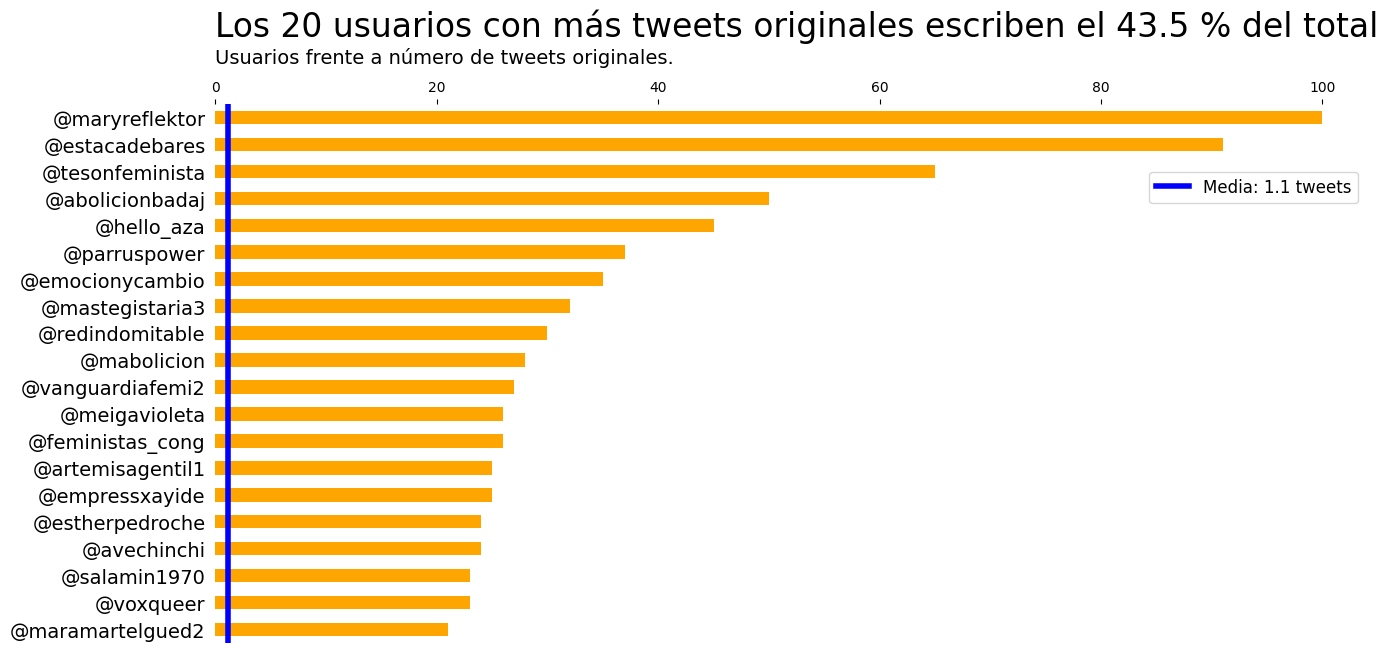

In [104]:
true_original_top20_sorted = volume.sort_values(by=['true_original_tweets'],ascending=True).tail(20)

ax = true_original_top20_sorted.plot.barh(x='author',y='true_original_tweets',figsize=(15,7),color='orange',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios con más tweets originales escriben el {} % del total'.format(true_original_top20_percentage),
         fontsize=23.8)
plt.text(0,21,'Usuarios frente a número de tweets originales.',fontsize=14)
plt.axvline(x=true_original_mean,color='blue',linewidth=4,label='Media: {} tweets'.format(true_original_mean))
plt.legend(bbox_to_anchor=(0.99,0.89),prop={'size': 12})
plt.savefig('6.1. originales.jpg',bbox_inches='tight',dpi=100)

### Aportaciones (tweets + RTs)

In [105]:
aportaciones_top20 = volume.sort_values(by=['total'],ascending=False).head(20)
aportaciones_top20.head()

,author,total,original_tweets,true_original_tweets,rts_made,rts_received
164,@maramartelgued2,421,22,21,399,44
43,@brujitarad,292,29,17,263,112
17,@rayashla,235,13,13,222,181
402,@esatesunaprueb1,204,0,0,204,0
485,@maioraane,173,1,1,172,13


In [106]:
# INT TEMPORAL
porcentaje_aportaciones_top20 = int((aportaciones_top20['total'].sum()/volume['total'].sum()*100).round(1))
porcentaje_aportaciones_top20

25

In [107]:
mean_aportaciones = round(volume['total'].mean(),1)
mean_aportaciones 

7.9

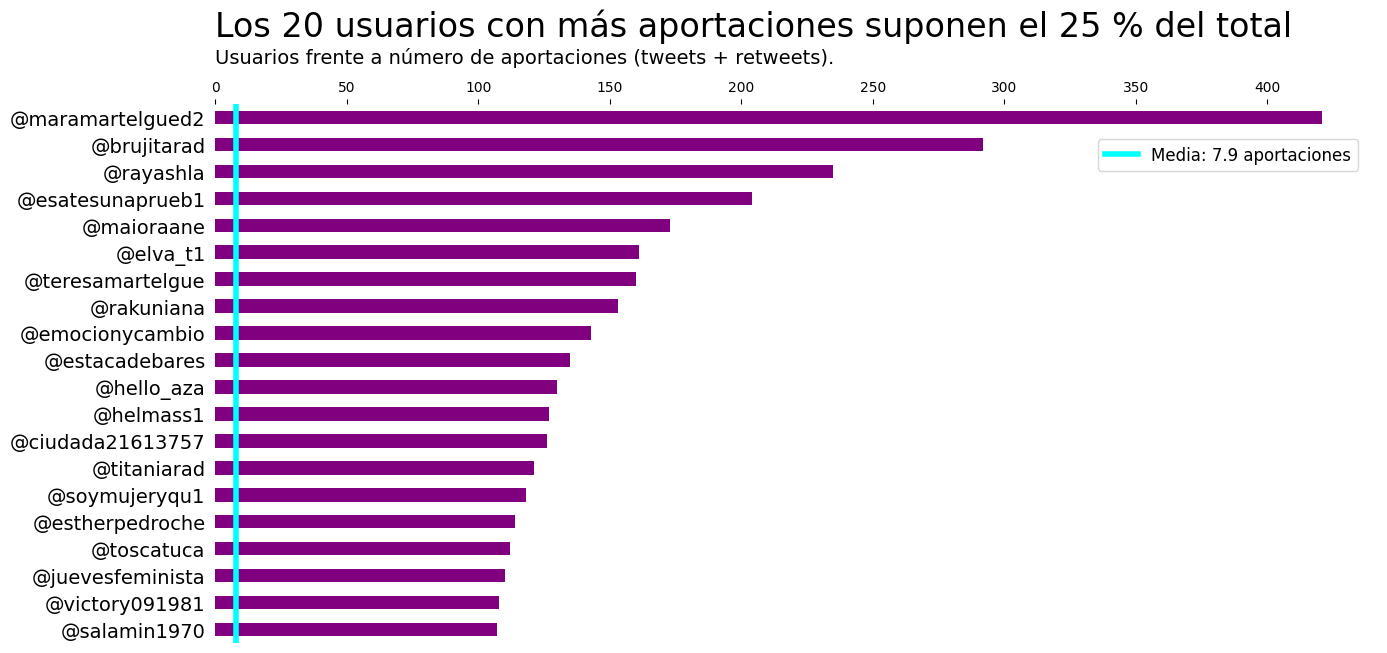

In [108]:
aportaciones_top20_sorted = volume.sort_values(by=['total'],ascending=True).tail(20)

ax = aportaciones_top20_sorted.plot.barh(x='author',y='total',figsize=(15,7),color='purple',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios con más aportaciones suponen el {} % del total'.format(porcentaje_aportaciones_top20),
         fontsize=24)
plt.text(0,21,'Usuarios frente a número de aportaciones (tweets + retweets).',fontsize=14)
plt.axvline(x=mean_aportaciones,color='cyan',linewidth=4,label='Media: {} aportaciones'.format(mean_aportaciones))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.2 aportaciones.jpg',bbox_inches='tight',dpi=100)

### Influencia (medida con los retweets recibidos) 

In [109]:
influencia_top20 = volume.sort_values(by=['rts_received'],ascending=False).head(20)
influencia_top20.head()

,author,total,original_tweets,true_original_tweets,rts_made,rts_received
13,@mabolicion,41,28,28,13,1245
86,@estherpedroche,114,31,24,83,969
10,@vanguardiafemi2,35,27,27,8,527
20,@estacadebares,135,92,91,43,332
46,@maryreflektor,105,102,100,3,319


In [110]:
porcentage_influencia_top20 = (influencia_top20['rts_received'].sum()/volume['rts_received'].sum()*100).round(1)
porcentage_influencia_top20

55.4

In [111]:
mean_rts_received = round(volume['rts_received'].mean(),1)
mean_rts_received

6.6

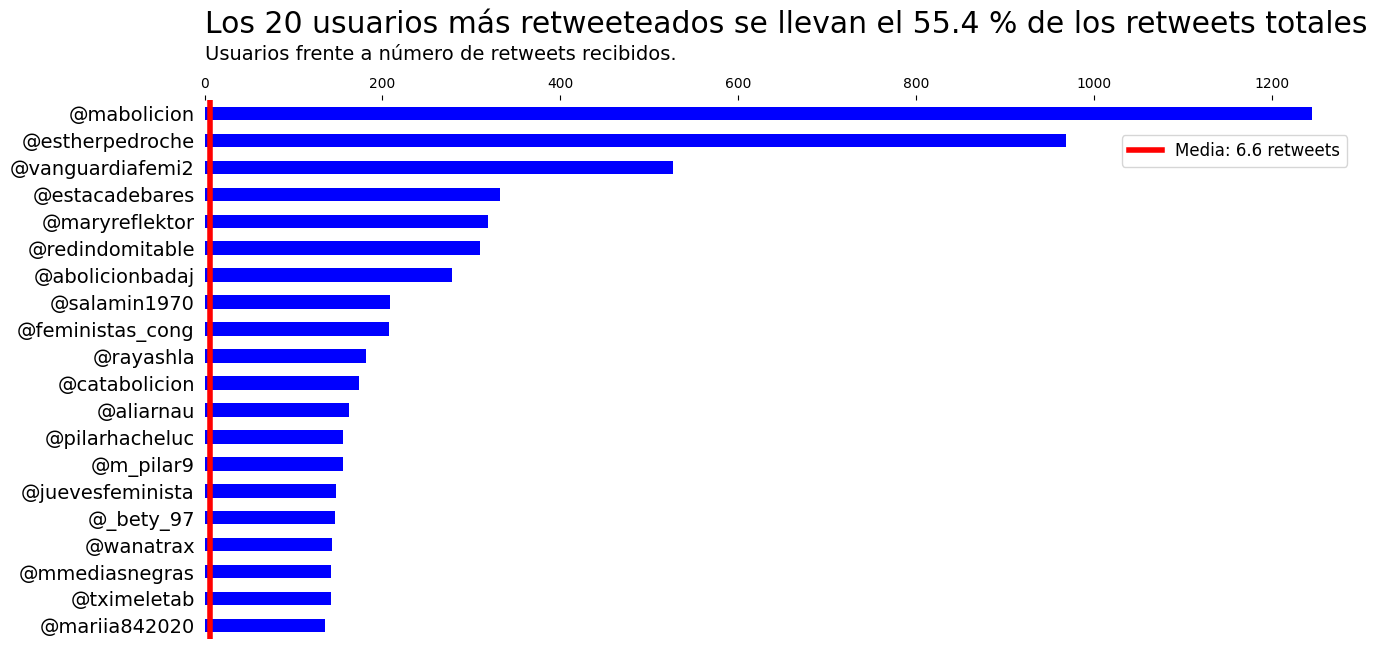

In [112]:
influencia_top20_sorted = volume.sort_values(by=['rts_received'],ascending=True).tail(20)

ax = influencia_top20_sorted.plot.barh(x='author',y='rts_received',figsize=(15,7),color='blue',label='',fontsize=14)

ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios más retweeteados se llevan el {} % de los retweets totales'.format(porcentage_influencia_top20),
         fontsize=21.5)
plt.text(0,21, 'Usuarios frente a número de retweets recibidos.',fontsize=14)
plt.axvline(x=mean_rts_received,color='red',linewidth=4,label='Media: {} retweets'.format(mean_rts_received))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.3 retweeteados.jpg',bbox_inches='tight',dpi=100)

### Retweets realizados

In [113]:
retweets_made_top20 = volume.sort_values(by=['rts_made'],ascending=False).head(20)
retweets_made_top20.head()

,author,total,original_tweets,true_original_tweets,rts_made,rts_received
164,@maramartelgued2,421,22,21,399,44
43,@brujitarad,292,29,17,263,112
17,@rayashla,235,13,13,222,181
402,@esatesunaprueb1,204,0,0,204,0
485,@maioraane,173,1,1,172,13


In [114]:
porcentage_rts_made_top20 = (retweets_made_top20['rts_made'].sum()/volume['rts_made'].sum()*100).round(1)
porcentage_rts_made_top20

27.3

In [115]:
mean_rts_made = round(volume['rts_made'].mean(),1)
mean_rts_made

6.6

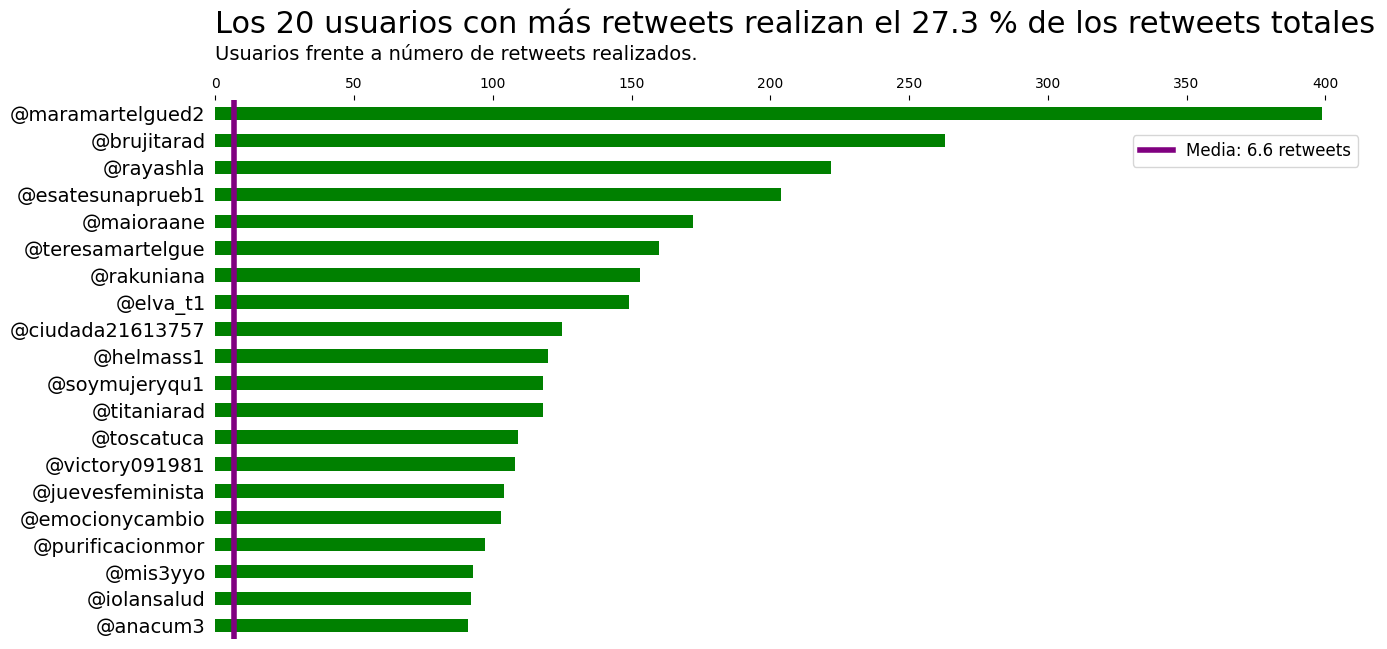

In [116]:
retweets_made_top20_sorted = volume.sort_values(by=['rts_made'],ascending=True).tail(20)

ax = retweets_made_top20_sorted.plot.barh(x='author',y='rts_made',figsize=(15,7),color='green',label='',fontsize=14)
ax.spines[['top','bottom','left','right']].set_visible(False)
plt.tick_params(axis='x',which='both',bottom=False,top=True,labelbottom=False,labeltop=True)
plt.tick_params(axis='y',which='both',left=False,right=False)
plt.xlabel('',fontsize=14)
plt.ylabel('')
plt.text(0,22,'Los 20 usuarios con más retweets realizan el {} % de los retweets totales'.format(porcentage_rts_made_top20),
         fontsize=22)
plt.text(0,21,'Usuarios frente a número de retweets realizados.',fontsize=14)
plt.axvline(x=mean_rts_received,color='purple',linewidth=4,label='Media: {} retweets'.format(mean_rts_made))
plt.legend(bbox_to_anchor=(0.99,0.95),prop={'size': 12})
plt.savefig('6.4 rts hechos.jpg',bbox_inches='tight',dpi=100)

Representamos las 4 medidas con gráficos de tarta.

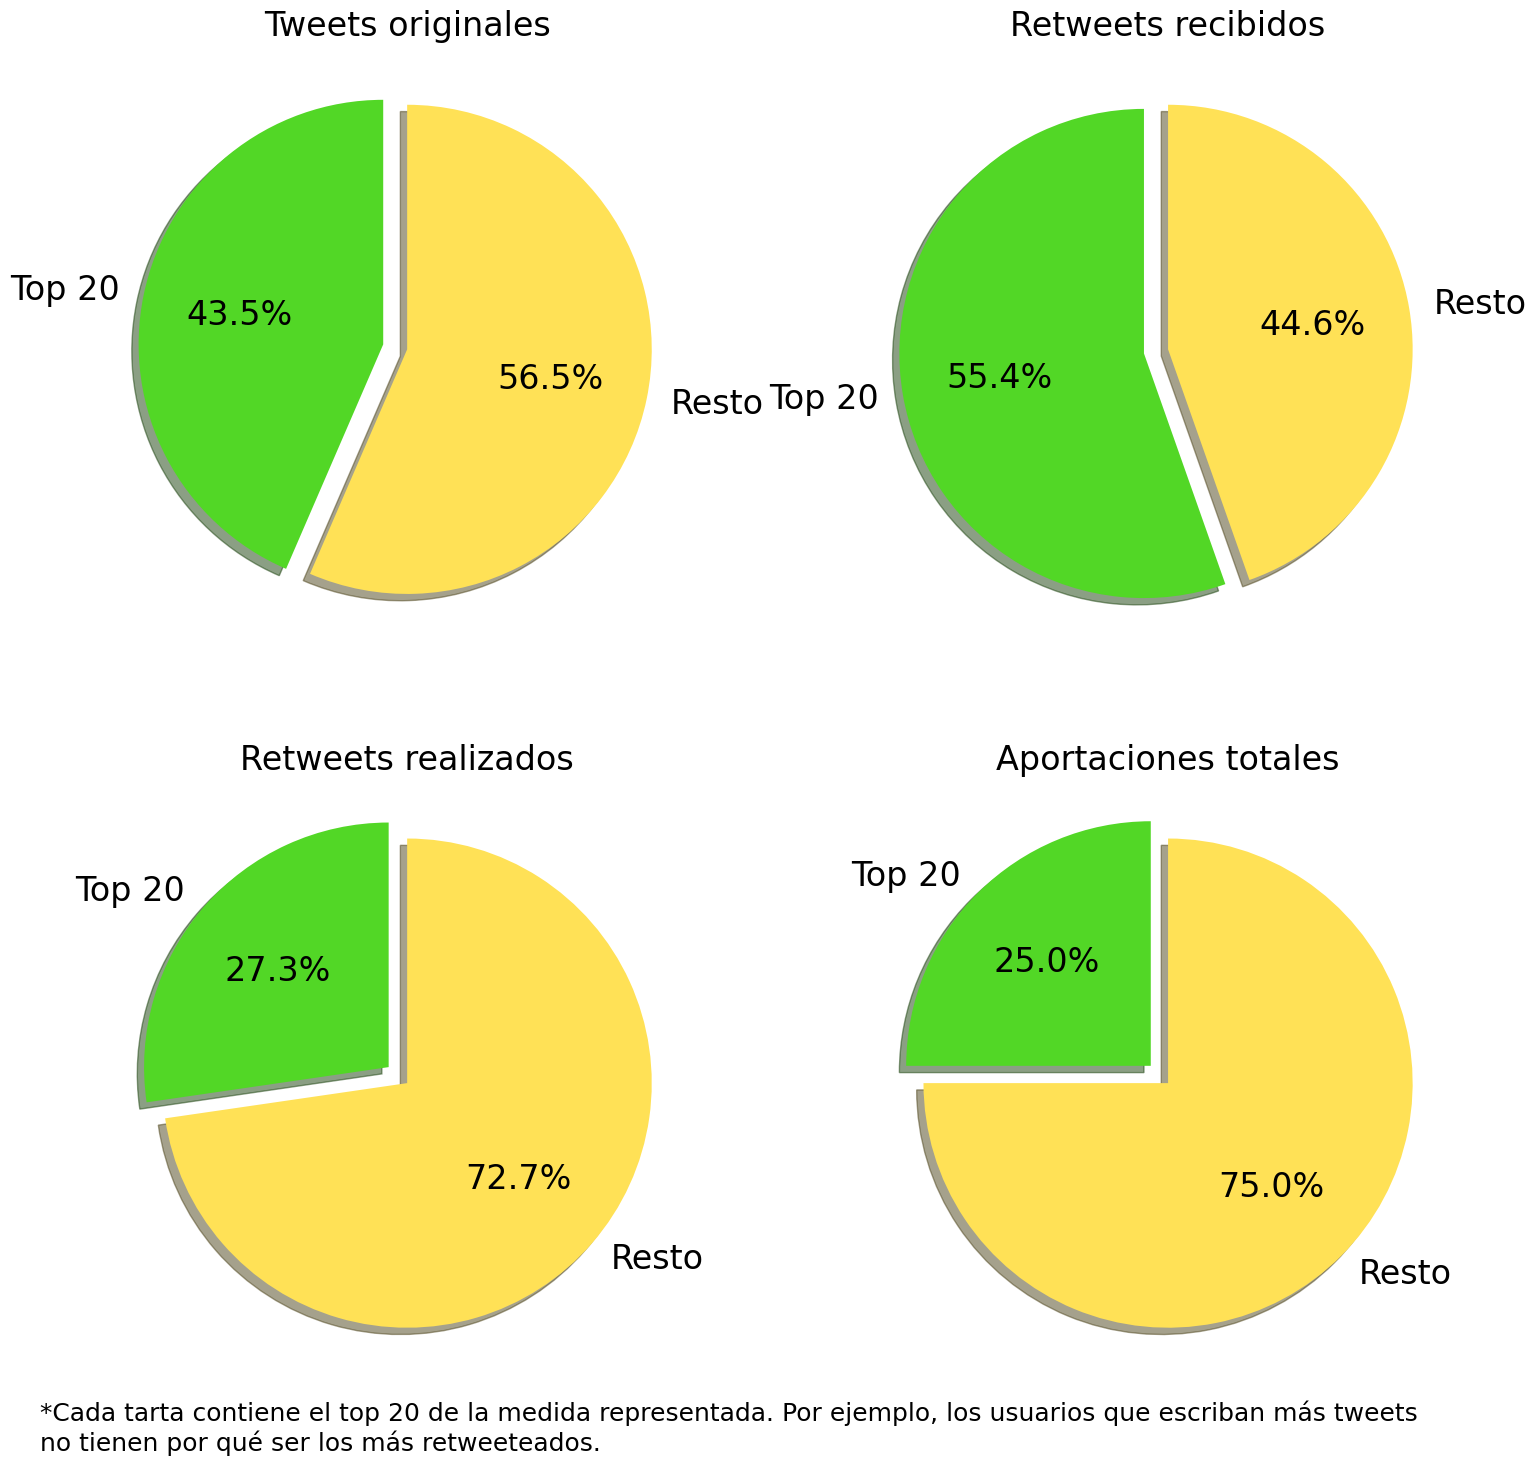

In [117]:
plt.figure(figsize=(18,27))
explode = (0.1, 0)
plt.subplot(3,2,1)
plt.pie([true_original_top20_percentage, 100-true_original_top20_percentage], explode=explode,
        labels=('Top 20', 'Resto'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Tweets originales',fontsize=24)
plt.text(-1.5,-4.5,'*Cada tarta contiene el top 20 de la medida representada. Por ejemplo, los usuarios que escriban más tweets\nno tienen por qué ser los más retweeteados.',
         fontsize=18)


plt.subplot(3, 2, 2)
plt.pie([porcentage_influencia_top20, 100-porcentage_influencia_top20], explode=explode,
        labels=('Top 20', 'Resto'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Retweets recibidos',fontsize=24)

plt.subplot(3, 2, 3)
plt.pie([porcentage_rts_made_top20, 100-porcentage_rts_made_top20], explode=explode,
        labels=('Top 20', 'Resto'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Retweets realizados',fontsize=24)

plt.subplot(3, 2, 4)
plt.pie([porcentaje_aportaciones_top20, 100-porcentaje_aportaciones_top20], explode=explode,
        labels=('Top 20', 'Resto'), autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 24,'color':"black"},
       colors = ['#52D726', '#FFE156'])
plt.title('Aportaciones totales',fontsize=24)

plt.savefig('6.5 todos juntos.jpg',bbox_inches='tight',dpi=100)

### Medida de esfuerzo inventada

En relación al número de tweets y retweets, podemos desarrollar una medida del esfuerzo que conlleva escribir un tweet original. Esto es diferente para cada hashtag, pues es más difícil escribir en un hashtag político que en #felizmartes, que es un hashtag donde cualquiera podría decir algo.

La medida de esfuerzo es el número de retweets dividido entre el número de tweets originales.

In [118]:
effort_variable = volume['rts_made'].sum()/volume['true_original_tweets'].sum()
effort_variable
effort_variable_rounded = effort_variable.round(1)
effort_variable_rounded

6.3

In [119]:
print('Hay {} retweets por cada tweet original.'.format(effort_variable_rounded))

Hay 6.3 retweets por cada tweet original.


Tomamos el top 20 de usuarios con más participaciones y calculamos su esfuerzo para comprobar si hacen más tweets originales o retweets.

In [120]:
volume['effort'] = volume['true_original_tweets']*effort_variable - volume['rts_made']
volume_top_20 = volume.sort_values(by=['total'], ascending=False).head(20)

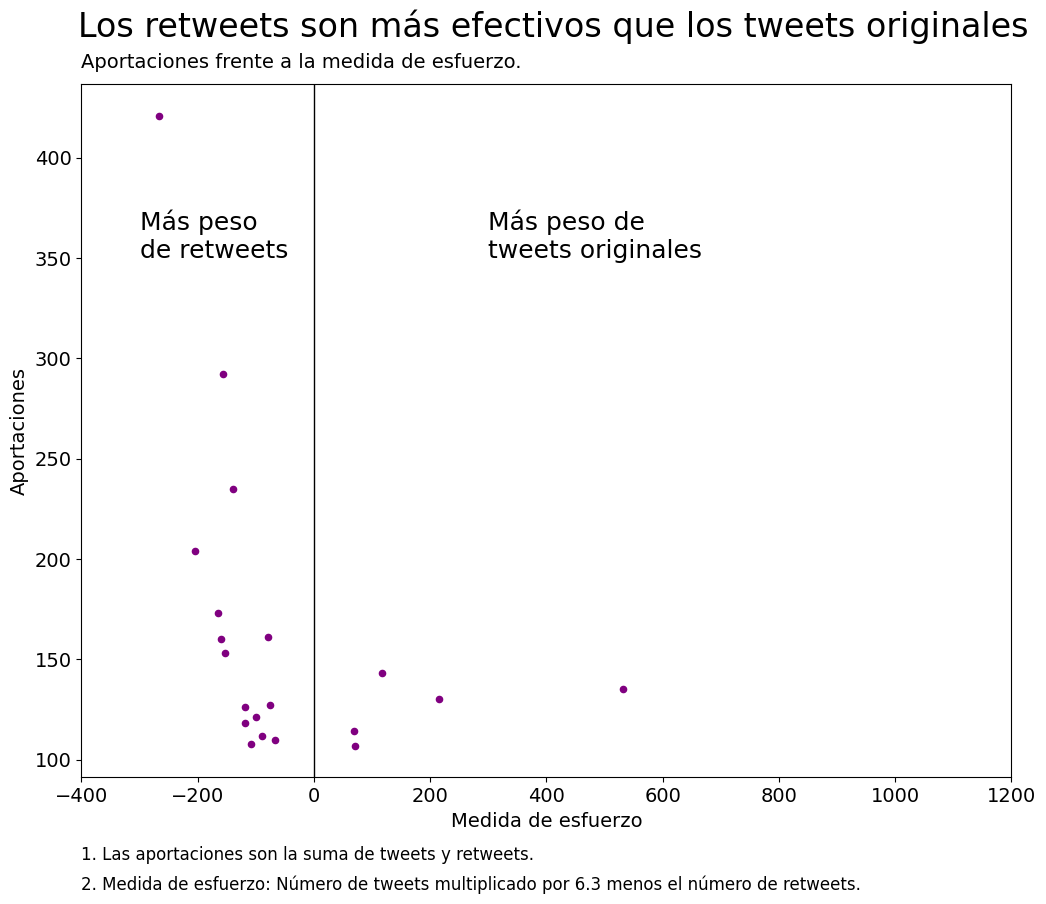

In [126]:
ax = volume_top_20.plot.scatter(x='effort',y='total',figsize=(12,9),fontsize=14,color='purple')
plt.xlabel('Medida de esfuerzo',fontsize=14)
plt.ylabel('Aportaciones',fontsize=14)
plt.text(-405,460,'Los retweets son más efectivos que los tweets originales',fontsize=24)
plt.text(-400,445,'Aportaciones frente a la medida de esfuerzo.',fontsize=14)
plt.text(-400,50,'1. Las aportaciones son la suma de tweets y retweets.',fontsize=12)
plt.text(-400,35,'2. Medida de esfuerzo: Número de tweets multiplicado por {} menos el número de retweets.'.format(effort_variable_rounded),
         fontsize=12)
plt.axvline(x=0,color='black',linewidth=1)
plt.xlim(-400,1200)
plt.text(-300,350,'Más peso\nde retweets',fontsize=18)
plt.text(300,350,'Más peso de\ntweets originales',fontsize=18)
plt.savefig('8. medida de esfuerzo.jpg',bbox_inches='tight',dpi=100)

### Porcentaje de tweets originales contra porcentaje de retweets.

In [122]:
original_percentage = (volume['true_original_tweets'].sum()/volume['total'].sum()*100).round(1)
rt_percentage = ((volume['rts_made'].sum()+copied_tweets)/volume['total'].sum()*100).round(1)
print(original_percentage,rt_percentage)

13.4 86.6


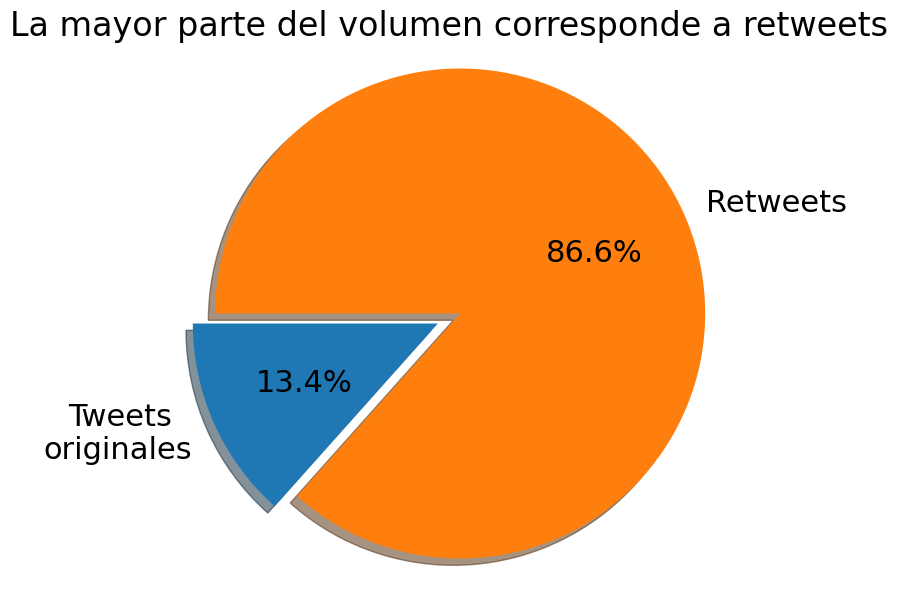

In [123]:
labels = 'Tweets  \noriginales', 'Retweets'
sizes = [original_percentage, rt_percentage]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=180, textprops={'fontsize': 22})
ax1.axis('equal')
plt.title('La mayor parte del volumen corresponde a retweets',fontsize=24)
plt.savefig('9.porcentaje de tweets y retweets.jpg',bbox_inches='tight',dpi=100)

## Palabras de odio (AVISO DE CONTENIDO)

Vamos a comprobar si algunas palabras que a menudo se usan contra las personas trans (especialmente contra las mujeres trans) aparecen en el hashtag.

In [124]:
lista_odio = ['pedofil','pederast','los trans','travesti','cuidapijas','enfermedad','cromosomas','viola','depreda','homofobo',
              'homofoba']

In [125]:
ht_terf_palabra = ht_terf[ht_terf['text'].str.contains('|'.join(lista_odio))]
ht_terf_palabra = ht_terf_palabra[['id tweet','author','text']]
ht_terf_palabra = ht_terf_palabra.drop_duplicates(subset='text',keep='first')
ht_terf_palabra = ht_terf_palabra[~ht_terf_palabra['text'].str.startswith('rt @')]
print('Hay',len(ht_terf_palabra),'tweets originales con odio hacia las personas trans según nuestra lista de palabras de odio.')
ht_terf_palabra.head()

Hay 30 tweets originales con odio hacia las personas trans según nuestra lista de palabras de odio.


,id tweet,author,text
596,1394561560710979586,@lauchagua,un hondureño se cambia de sexo para evadir a la justicia por la violación de un niño #leytransespatriarcal #aquiestamoslasfeministas cc @psoe @gpscongreso https://t.co/rxkz8lmvax
624,1394562041474699266,@lauchagua,un transexual cumplirá pena en el módulo de reclusas pese a estar condenado por violar a una mujer #leytransespatriarcal #aquiestamoslasfeministas cc @psoe @gpscongreso https://t.co/uc9oqtx9yl
1007,1394565005945753602,@lauchagua,porque al final los violadores son xy y las violadas xx. #leytransespatriarcal #aquiestamoslasfeministas cc @psoe @gpscongreso https://t.co/ll84fo4qkz
1137,1394566105851731969,@estacadebares,hay pedofilia en la ideología queer. #noleytrans #laleytransespatriarcal #aquiestamoslasfeministas @gpscongreso @psoe @podemos https://t.co/f7tvhdnmse
1297,1394568281684598784,@estacadebares,hay pedofilia en lo queer. #noleytrans #leytransespatriarcal #aquiestamoslasfeministas @gpscongreso @psoe @podemos https://t.co/yrkfhbbvpz


### Conclusiones 

Hemos demostrado varias hipótesis sobre #aquiestamoslasfeministas:  
&emsp;- No fue espontáneo, sino preparado.  
&emsp;- Tuvo una clara intención política.  
&emsp;- Intentaron abusar del algoritmo de Twitter mediante comportamiento de bots: un gran volumen con mayoría de reweets y copia de tweets.  
&emsp;- Aunque aparentemente estaba en contra de una ley, contiene mucho odio hacia las personas trans.